Here we are downloading the abalone zip and installing the pycaret packages to be used to create our model.

In [4]:
!wget -q https://archive.ics.uci.edu/static/public/1/abalone.zip
!unzip -q abalone.zip

!pip install pycaret

replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


For this section of the code im starting by adding the necessary libraries to complete this classification. I am also importing the data set and determining the features of the set as columns.

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pycaret

data = pd.read_csv('abalone.data')
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In this section im seeing which entries in the data set have a value of  females, males and infants (F, M and I). combining the 3 printed values adds up to 1 which means all entries are included in these 3 queries.

In [20]:
#rows with sex M
sex_M = (data['sex'].value_counts(normalize=True).get('M'))
print(sex_M)

#rows with sex F
sex_F = (data['sex'].value_counts(normalize=True).get('F'))
print(sex_F)

#rows with sex I
sex_I = (data['sex'].value_counts(normalize=True).get('I'))
print(sex_I)

0.3656609195402299
0.31297892720306514
0.321360153256705


This line is used to initialize the training environment and identify our target feature as Sex. The first thing I will do is remove the unnecasry features of the data set. After some research and working with this data, the 3 features rings, length and shell weight are the least important features when it comes to predicting the sex of abalones. For this reason I drop those 3 columns, and then create the model. Setup must be the first function called before any other pycaret function. Next we use the compare_models function to see which model is most accurate for our data set.

In [21]:
from pycaret.classification import *
data = data.drop(columns=['length', 'shell_weight', 'rings'])
s = setup(data, target = 'sex')
s = compare_models()

,Description,Value
0,Session id,411
1,Target,sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4176, 6)"
5,Transformed data shape,"(4176, 6)"
6,Transformed train set shape,"(2923, 6)"
7,Transformed test set shape,"(1253, 6)"
8,Numeric features,5
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5487,0.0000,0.5487,0.5469,0.5236,0.3155,0.3278,0.0480
gbc,Gradient Boosting Classifier,0.5453,0.0000,0.5453,0.5346,0.5337,0.3153,0.3188,1.3680
svm,SVM - Linear Kernel,0.5398,0.0000,0.5398,0.4949,0.4640,0.3006,0.3390,0.0560
ada,Ada Boost Classifier,0.5398,0.0000,0.5398,0.5298,0.5178,0.3039,0.3128,0.3310
lda,Linear Discriminant Analysis,0.5347,0.0000,0.5347,0.5328,0.5242,0.2957,0.3009,0.0540
rf,Random Forest Classifier,0.5340,0.7206,0.5340,0.5251,0.5273,0.2998,0.3011,0.6800
ridge,Ridge Classifier,0.5337,0.0000,0.5337,0.5207,0.5069,0.2961,0.3062,0.0400
et,Extra Trees Classifier,0.5316,0.7192,0.5316,0.5256,0.5267,0.2966,0.2976,0.3920
lightgbm,Light Gradient Boosting Machine,0.5299,0.7235,0.5299,0.5226,0.5244,0.2939,0.2949,2.8260
xgboost,Extreme Gradient Boosting,0.5286,0.7158,0.5286,0.5219,0.5238,0.2916,0.2924,0.2370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

This segment is uses the most accurate model from above which is logistic regression and shows a confusion matrix based on the dataset.

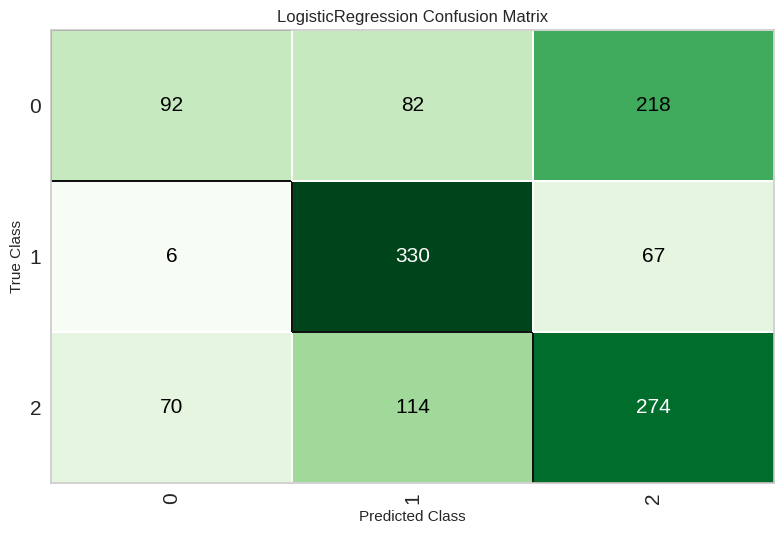

In [22]:
plot_model(s, plot='confusion_matrix')

With this segment we can display which features are most important in determining the sex of the abalones. Height, viscera weight, diameter, whole weight and shucked weight are very important.

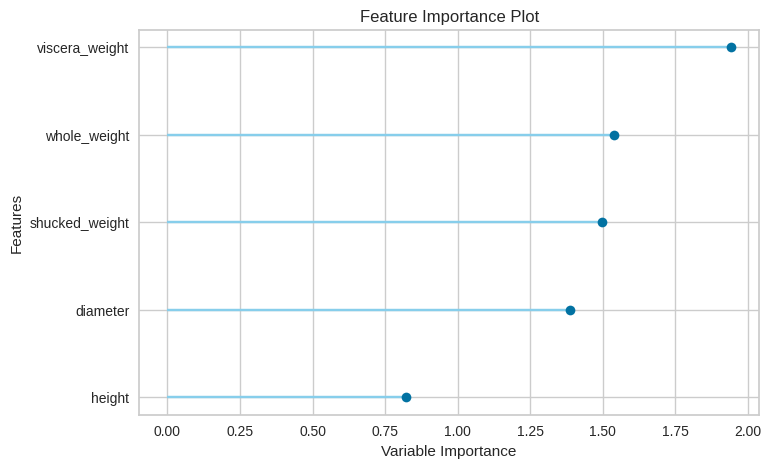

In [23]:
plot_model(s, plot='feature')

This segment lets us see how the model predicts the sex of some data based on the model. We can see that of the 10 data entries, the model only correctly predicted 4 of those entries.

In [24]:
prediction = predict_model(s)
prediction.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5555,0.7472,0.5555,0.5523,0.5282,0.3264,0.3391


,diameter,height,whole_weight,shucked_weight,viscera_weight,sex,prediction_label,prediction_score
2985,0.405,0.175,1.2705,0.5480,0.3265,M,M,0.5396
2928,0.490,0.160,1.1545,0.5865,0.2385,I,M,0.5000
2991,0.430,0.165,0.9845,0.4525,0.2070,I,M,0.4882
185,0.480,0.150,1.0525,0.3920,0.3360,F,F,0.5183
1456,0.365,0.115,0.5660,0.2810,0.1170,F,I,0.4738
2380,0.115,0.025,0.0240,0.0090,0.0050,M,I,0.8715
333,0.600,0.195,1.9740,0.5980,0.4085,F,F,0.6007
3512,0.500,0.175,1.3275,0.5560,0.2805,F,M,0.4938
1358,0.490,0.140,0.9755,0.4190,0.2060,M,M,0.4436
305,0.120,0.030,0.0215,0.0070,0.0050,I,I,0.8727


In conclusion, using the most accurate model given by pycaret, we see that Linear Regression performs the best while stil not being very accurate. With an accuracy of only 55% it's difficult to say that it is an effective model for predicting the gender of abalones. Originally, I had created this model using all attributes, however I saw that the 3 features I dropped had close to no impact on the results of the predictions. After removing those 3 least necessary features from the data set, the predictions that the data set makes is actually better than before, where it had the same accuracy score, but only predicted 2/10 abalones correctly.